## RUN WITH PYTHON 2!! Extracts a trace from Allen Institute Cell Types Database. Adapted from
## https://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html

In [19]:
%matplotlib inline
from __future__ import division
import numpy as np
import cPickle as pickle
import os
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import matplotlib.pyplot as plt

In [21]:
def pikl_save(data, file):
    """Saves data to a file."""

    f = open(file, 'wb')
    pickle.dump(data, f)
    f.close()


def pikl_load(file):
    """Loads data from file."""

    f = open(file, 'rb')
    data = pickle.load(f)
    f.close()
    return data

In [22]:
dir_cache='../results/hh/data/'
ephys_cell=464212183
sweep_number=33
t_offset = 1015.
duration = 1250.
real_data_path = dir_cache + 'ephys_cell_{}_sweep_number_{}.pkl'.format(ephys_cell,sweep_number)
if not os.path.isfile(real_data_path):
    manifest_file = 'cell_types/manifest.json'

    cta = CellTypesApi()
    ctc = CellTypesCache(manifest_file=manifest_file)
    data_set = ctc.get_ephys_data(ephys_cell)
    sweep_data = data_set.get_sweep(sweep_number)  # works with python2 and fails with python3
    sweeps = cta.get_ephys_sweeps(ephys_cell)

    sweep = sweeps[sweep_number]

    index_range = sweep_data["index_range"]
    i = sweep_data["stimulus"][0:index_range[1]+1] # in A
    v = sweep_data["response"][0:index_range[1]+1] # in V
    sampling_rate = sweep_data["sampling_rate"] # in Hz
    dt = 1e3/sampling_rate # in ms
    i *= 1e6 # to mA
    v *= 1e3 # to mV
    v = v[int(t_offset/dt):int((t_offset+duration)/dt)]
    i = i[int(t_offset/dt):int((t_offset+duration)/dt)]


    real_data_obs = np.array(v).reshape(-1,1)
    I_real_data = np.array(i).reshape(-1)
    t_on = int(sweep['stimulus_start_time']*sampling_rate)*dt-t_offset
    t_off = int( (sweep['stimulus_start_time']+sweep['stimulus_duration'])*sampling_rate )*dt-t_offset
    
    # save data to a file
    pikl_save((real_data_obs,I_real_data,dt,t_on,t_off),real_data_path)

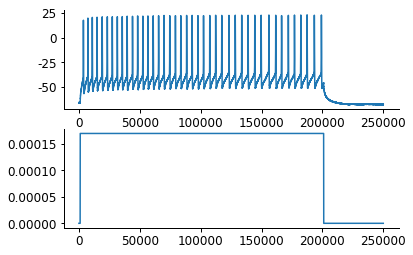

In [23]:
# load saved data
real_data_obs1,I_real_data1,dt1,t_on1,t_off1 = pikl_load(real_data_path)

# plotting loaded data
plt.subplot(2,1,1)
plt.plot(real_data_obs1)

plt.subplot(2,1,2)
plt.plot(I_real_data1)